In [3]:
#all imports required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log2 as log
%matplotlib inline

In [ ]:
df_ecommerce = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df_ecommerce

In [8]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [ ]:
df_ecommerce.columns

Data Explorations:

Warehouse Block:

In [13]:
df_ecommerce['Warehouse_block'].describe()

count     10999
unique        5
top           F
freq       3666
Name: Warehouse_block, dtype: object

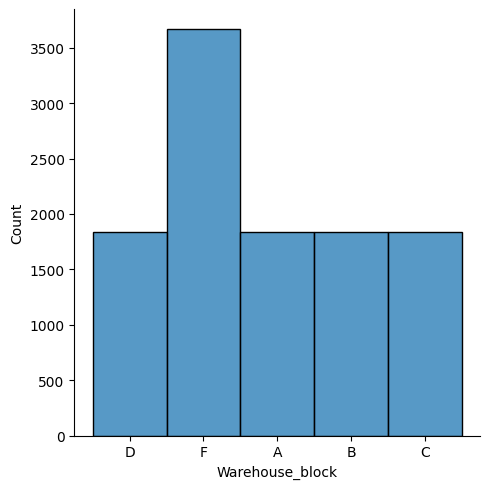

In [10]:
sns.displot(df_ecommerce['Warehouse_block'])

#alle außer F(~3666) kommen gleich oft vor (~1800)

Mode of Shipment:

In [12]:
df_ecommerce['Mode_of_Shipment'].describe()

count     10999
unique        3
top        Ship
freq       7462
Name: Mode_of_Shipment, dtype: object

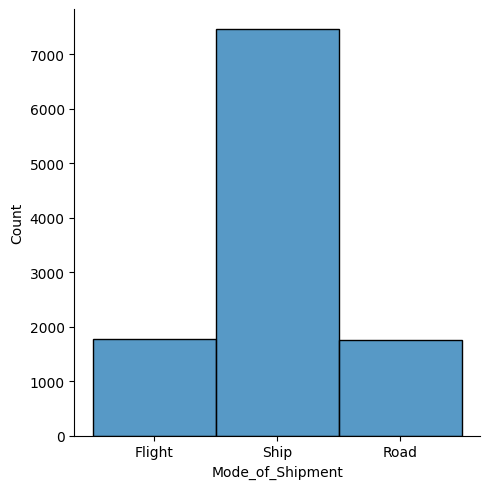

In [15]:
sns.displot(df_ecommerce['Mode_of_Shipment'])

#Ship 7462, Flight und Road beide ~1800

Customer Rating:

In [ ]:
df_ecommerce['Customer_rating'].describe()

#durchschnitt 2.99 mit hoher(?) standartabweichung von 1.4

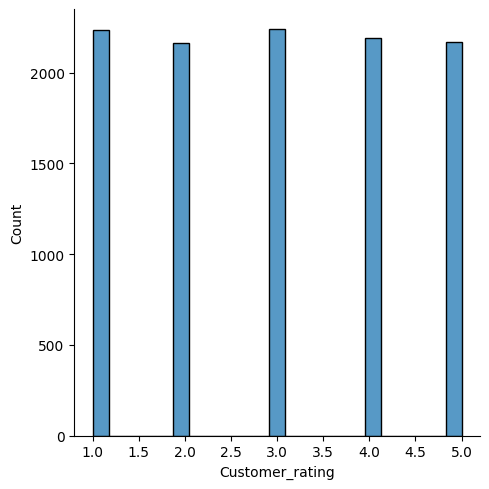

In [41]:
sns.displot(df_ecommerce['Customer_rating'])

#sagt uns garnix

Prior Purchases:

In [ ]:
df_ecommerce['Prior_purchases'].describe()

#durchschnitt 3.57 mit standartabweichung 1.52

In [ ]:
sns.displot(df_ecommerce['Prior_purchases'])

Customer Care Calls:

In [ ]:
df_ecommerce['Customer_care_calls'].describe()

# durchschnitt 4.05 mit standartabweichung 1.14

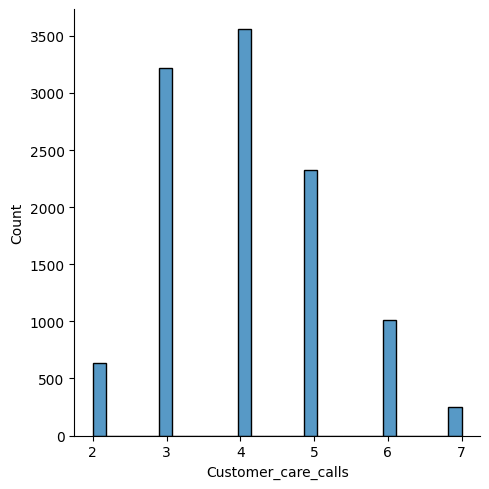

In [42]:
sns.displot(df_ecommerce['Customer_care_calls'])

Cost of Product:

In [ ]:
df_ecommerce['Cost_of_the_Product'].describe()

In [ ]:
sns.displot(df_ecommerce['Cost_of_the_Product'])

Product Importance:

In [17]:
df_ecommerce['Product_importance'].describe()

count     10999
unique        3
top         low
freq       5297
Name: Product_importance, dtype: object

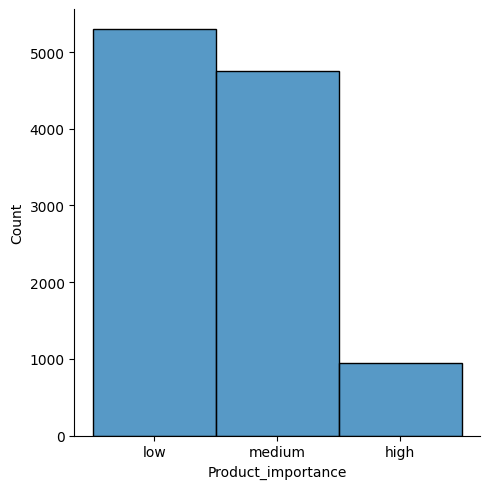

In [18]:
sns.displot(df_ecommerce['Product_importance'])

#low 5297, medium ~4800, high ~900

Gender:

In [21]:
df_ecommerce['Gender'].describe()

# Female 5545, Male 5454 also ~50/50

count     10999
unique        2
top           F
freq       5545
Name: Gender, dtype: object

Discount offered: 

In [22]:
df_ecommerce['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

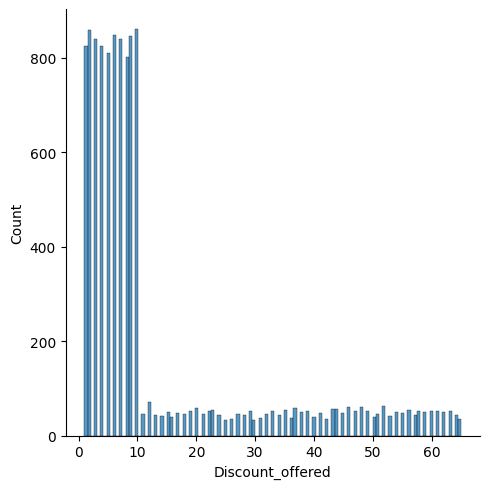

In [23]:
sns.displot(df_ecommerce['Discount_offered'])

#mehrheitlich(75%) weniger als 10%

Weight in gms:

In [24]:
df_ecommerce['Weight_in_gms'].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

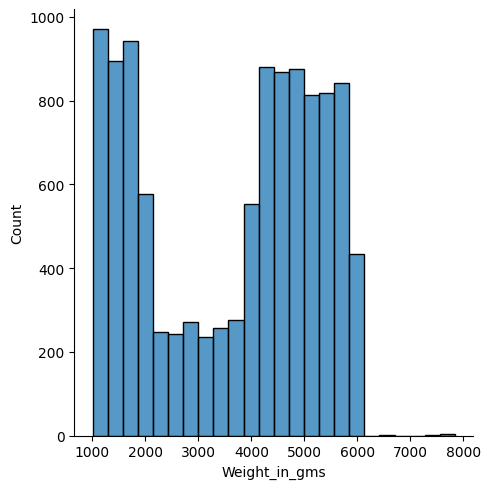

In [25]:
sns.displot(df_ecommerce['Weight_in_gms'])

#viel wiegt unter 2000 und viel zwischen 4000 - 6000

#TODO wie viel genau und Zusammenhänge(?)

Reached on time:

In [26]:
df_ecommerce['Reached.on.Time_Y.N'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [30]:
df = pd.read_csv("E-Commerce Shipping_data.csv", usecols=['ID','Reached.on.Time_Y.N'])
df.groupby(['Reached.on.Time_Y.N']).count()

#4436 sind nicht on time angekommen, 6563 sind es

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


Korrelation zwischen Customer Rating und Cost of Product:

(-0.5, 214.5, 0.0, 6.0)

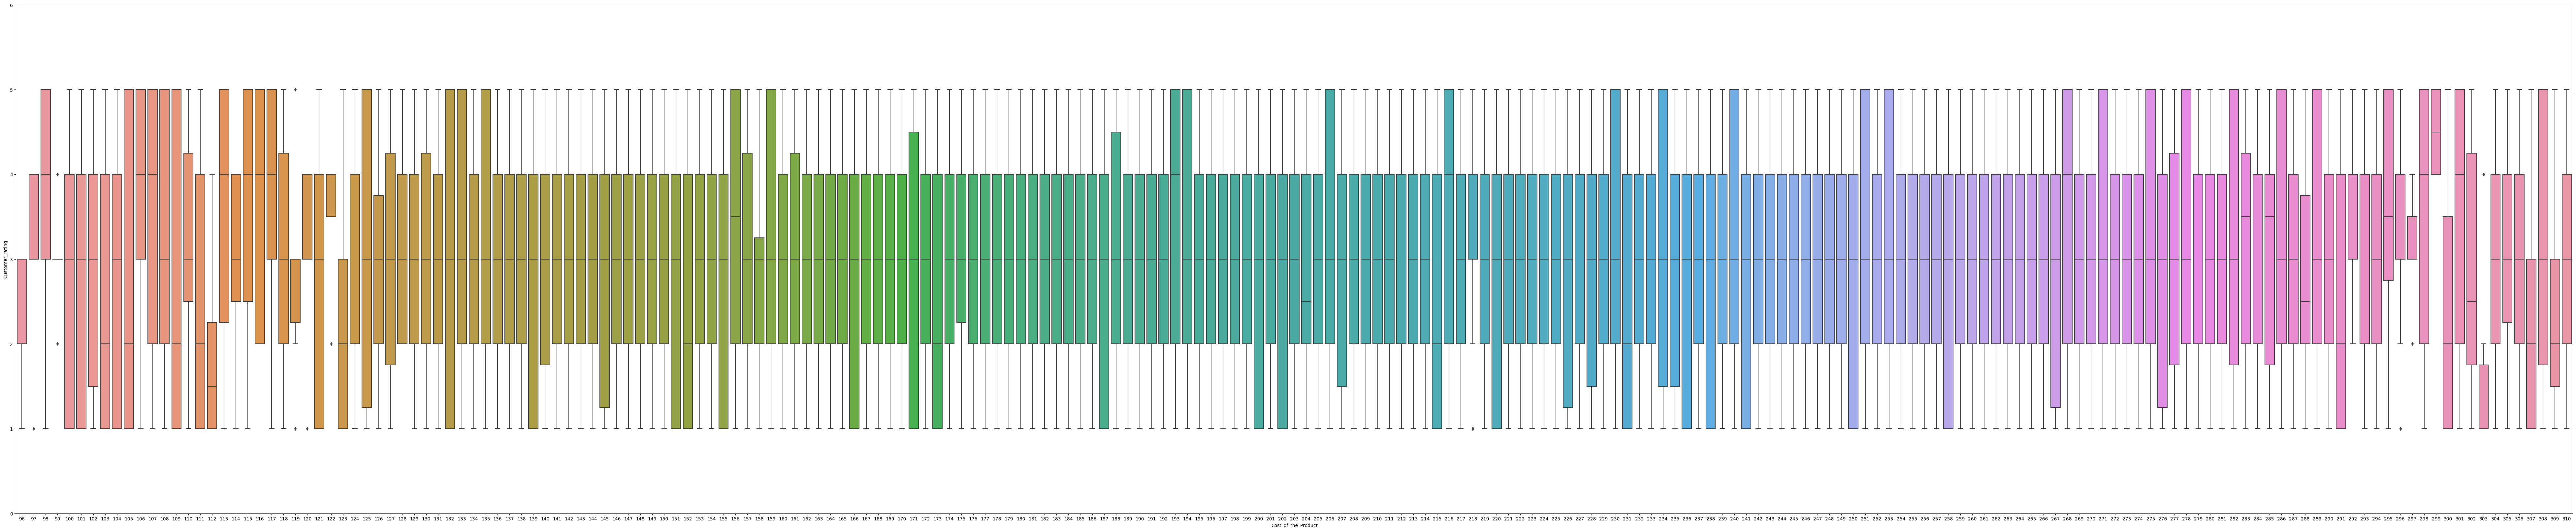

In [37]:
cost = 'Cost_of_the_Product'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[cost], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(100, 20))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

# korreliert nicht

#TODO Nicht-Korrelation besser beweisen/veranschaulichen

Korrelation zwischen Customer Rating und Customer Calls:

(-0.5, 5.5, 0.0, 6.0)

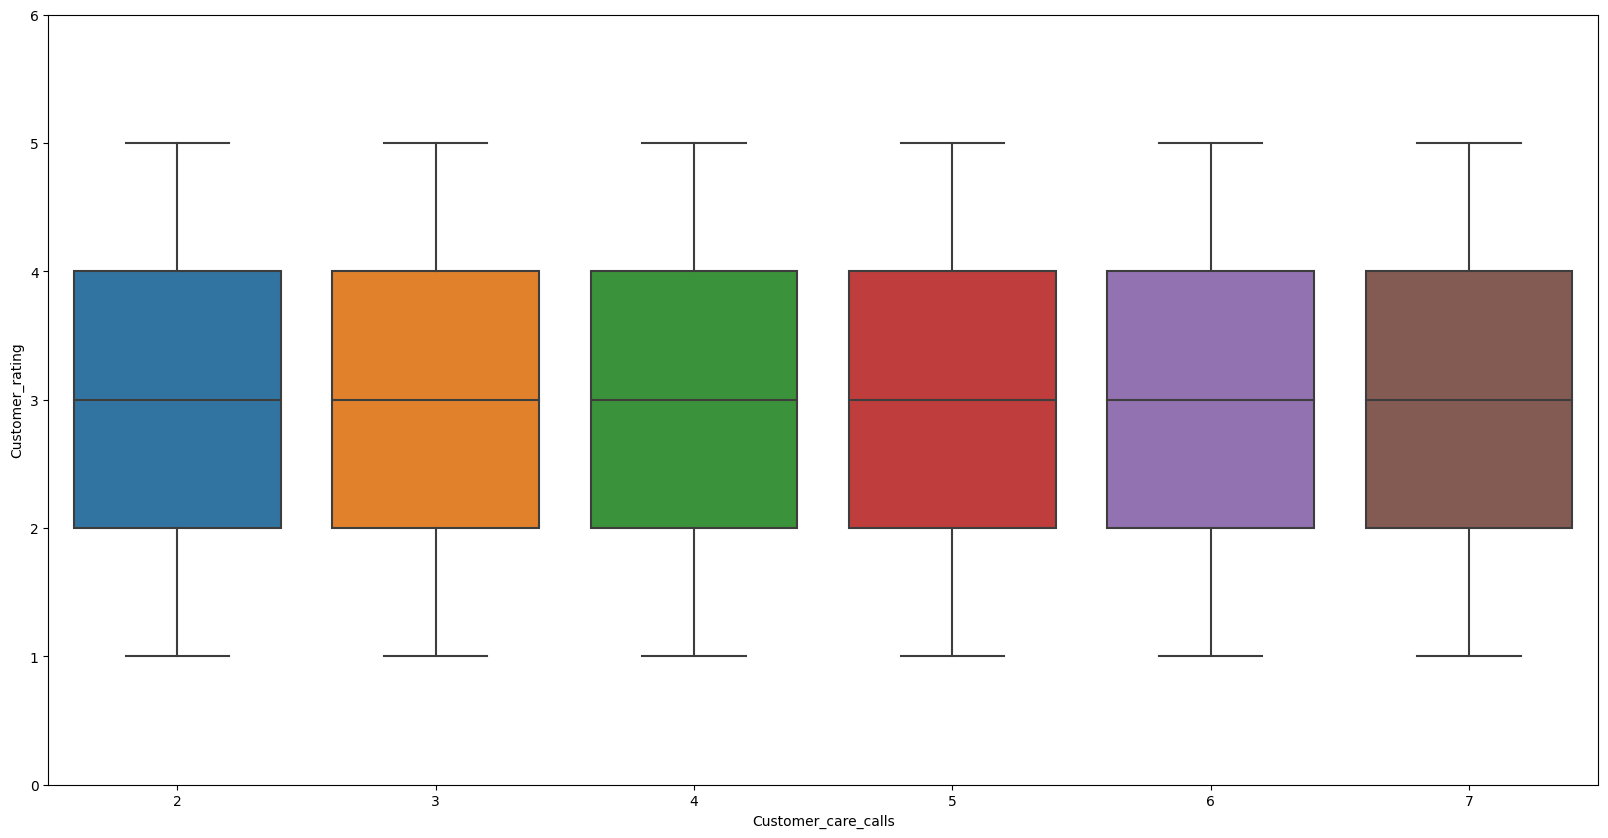

In [43]:
calls = 'Customer_care_calls'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[calls], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

#korreliert nicht

Korrelation